# Creating the Dataset

In [212]:
import pandas as pd
import numpy as np

# Create a new DataFrame with the specified economic columns
economic_df = pd.DataFrame()

# Display the empty DataFrame
economic_df.head()

""


In [213]:
# Read the CSV file for GDP growth
gdp_growth_df = pd.read_csv('GDPC1_CCH.csv')

# Extract Year and Quarter from the observation_date
gdp_growth_df['Year'] = pd.to_datetime(gdp_growth_df['observation_date']).dt.year
gdp_growth_df['Quarter'] = pd.to_datetime(gdp_growth_df['observation_date']).dt.quarter

# Fill in the Year, Quarter, and GDP_Growth columns in the economic_df DataFrame
economic_df['Year'] = gdp_growth_df['Year']
economic_df['Quarter'] = gdp_growth_df['Quarter']
economic_df['GDP_Growth'] = gdp_growth_df['GDPC1_CCH']
economic_df['Recession'] = economic_df['GDP_Growth'] < 0

# Display the updated DataFrame
economic_df.head()



,Year,Quarter,GDP_Growth,Recession
0,1950,1,3.85636,False
1,1950,2,3.00531,False
2,1950,3,3.79224,False
3,1950,4,1.89685,False
4,1951,1,1.34882,False


In [214]:
# Read the CSV file for Unemployment Rate
unemployment_df = pd.read_csv('UNRATE.csv')

# Extract Year and Quarter from the observation_date
unemployment_df['Year'] = pd.to_datetime(unemployment_df['observation_date']).dt.year
unemployment_df['Quarter'] = pd.to_datetime(unemployment_df['observation_date']).dt.quarter
unemployment_df.rename(columns={'UNRATE': 'Unemployment_Rate'}, inplace=True)

# Merge the unemployment data into the economic_df DataFrame
economic_df = economic_df.merge(unemployment_df[['Year', 'Quarter', 'Unemployment_Rate']], on=['Year', 'Quarter'], how='left')

# Display the updated DataFrame
economic_df.head()



,Year,Quarter,GDP_Growth,Recession,Unemployment_Rate
0,1950,1,3.85636,False,6.4
1,1950,2,3.00531,False,5.6
2,1950,3,3.79224,False,4.6
3,1950,4,1.89685,False,4.2
4,1951,1,1.34882,False,3.5


In [215]:
# Read the CSV file for Inflation Rate
inflation_df = pd.read_csv('CPIAUCSL_PC1.csv')

# Extract Year and Quarter from the observation_date
inflation_df['Year'] = pd.to_datetime(inflation_df['observation_date']).dt.year
inflation_df['Quarter'] = pd.to_datetime(inflation_df['observation_date']).dt.quarter
inflation_df.rename(columns={'CPIAUCSL_PC1': 'Inflation_Rate'}, inplace=True)

# Merge the inflation data into the economic_df DataFrame
economic_df = economic_df.merge(inflation_df[['Year', 'Quarter', 'Inflation_Rate']], on=['Year', 'Quarter'], how='left')

# Display the updated DataFrame
economic_df.head()

,Year,Quarter,GDP_Growth,Recession,Unemployment_Rate,Inflation_Rate
0,1950,1,3.85636,False,6.4,-1.48963
1,1950,2,3.00531,False,5.6,-0.62718
2,1950,3,3.79224,False,4.6,2.05200
3,1950,4,1.89685,False,4.2,4.36743
4,1951,1,1.34882,False,3.5,8.94573


In [216]:
# Read the CSV file for Gas Prices
gas_prices_df = pd.read_csv('CUUR0000SETB01_CCH.csv')

# Extract Year and Quarter from the observation_date
gas_prices_df['Year'] = pd.to_datetime(gas_prices_df['observation_date']).dt.year
gas_prices_df['Quarter'] = pd.to_datetime(gas_prices_df['observation_date']).dt.quarter
gas_prices_df.rename(columns={'CUUR0000SETB01_CCH': 'Gas_Prices'}, inplace=True)

# Merge the gas prices data into the economic_df DataFrame
economic_df = economic_df.merge(gas_prices_df[['Year', 'Quarter', 'Gas_Prices']], on=['Year', 'Quarter'], how='left')

# Display the updated DataFrame
economic_df.head()

,Year,Quarter,GDP_Growth,Recession,Unemployment_Rate,Inflation_Rate,Gas_Prices
0,1950,1,3.85636,False,6.4,-1.48963,-2.65268
1,1950,2,3.00531,False,5.6,-0.62718,1.06953
2,1950,3,3.79224,False,4.6,2.05200,1.58315
3,1950,4,1.89685,False,4.2,4.36743,1.55847
4,1951,1,1.34882,False,3.5,8.94573,0.51414


In [217]:
# Read the CSV file for SNP500 data
snp500_df = pd.read_csv('SNP500.csv')

# Calculate the Quarter from the Month
snp500_df['Quarter'] = snp500_df['Month'].apply(lambda x: (x - 1) // 3 + 1)

# Convert 'Return (%)' to float
snp500_df['Return (%)'] = snp500_df['Return (%)'].str.replace('%', '').astype(float) / 100

# Calculate the compounded SNP500 return for each quarter
snp500_df['Compounded_Return'] = snp500_df['Return (%)'] + 1
quarterly_compounded_snp500 = snp500_df.groupby(['Year', 'Quarter'])['Compounded_Return'].prod().reset_index()
quarterly_compounded_snp500['SP500_Return_Rate'] = (quarterly_compounded_snp500['Compounded_Return'] - 1) * 100

# Drop the intermediate 'Compounded_Return' column
quarterly_compounded_snp500.drop(columns=['Compounded_Return'], inplace=True)

# Merge the SNP500 data into the economic_df DataFrame
economic_df = economic_df.merge(quarterly_compounded_snp500, on=['Year', 'Quarter'], how='left')

# Display the updated DataFrame
economic_df.tail()

,Year,Quarter,GDP_Growth,Recession,Unemployment_Rate,Inflation_Rate,Gas_Prices,SP500_Return_Rate
295,2023,4,0.78558,False,3.8,3.23615,-10.05236,13.219812
296,2024,1,0.40399,False,3.8,3.24919,-3.21356,6.530821
297,2024,2,0.73626,False,4.0,3.19431,8.94288,8.686055
298,2024,3,0.75664,False,4.2,2.64001,-5.55704,4.927910
299,2024,4,0.55662,False,4.1,2.73538,-8.63110,4.400000


In [218]:
# Read the CSV file for Consumer_Confidence pct change Rate
consumer_confidence_df = pd.read_csv('UMCSENT.csv')

# Extract Year and Quarter from the observation_date
consumer_confidence_df['Year'] = pd.to_datetime(consumer_confidence_df['observation_date']).dt.year
consumer_confidence_df['Quarter'] = pd.to_datetime(consumer_confidence_df['observation_date']).dt.quarter
consumer_confidence_df.rename(columns={'UMCSENT': 'Consumer_Confidence'}, inplace=True)

# Merge the consumer confidence data into the economic_df DataFrame
economic_df = economic_df.merge(consumer_confidence_df[['Year', 'Quarter', 'Consumer_Confidence']], on=['Year', 'Quarter'], how='left')

# Display the updated DataFrame
economic_df.head()

,Year,Quarter,GDP_Growth,Recession,Unemployment_Rate,Inflation_Rate,Gas_Prices,SP500_Return_Rate,Consumer_Confidence
0,1950,1,3.85636,False,6.4,-1.48963,-2.65268,7.458165,NaN
1,1950,2,3.00531,False,5.6,-0.62718,1.06953,-0.979123,NaN
2,1950,3,3.79224,False,4.6,2.05200,1.58315,16.263185,NaN
3,1950,4,1.89685,False,4.2,4.36743,1.55847,8.626437,NaN
4,1951,1,1.34882,False,3.5,8.94573,0.51414,5.142996,NaN


In [219]:
# Read the CSV file for Federal Funds Rate
federal_funds_df = pd.read_csv('DFF.csv')

# Extract Year and Quarter from the observation_date
federal_funds_df['Year'] = pd.to_datetime(federal_funds_df['observation_date']).dt.year
federal_funds_df['Quarter'] = pd.to_datetime(federal_funds_df['observation_date']).dt.quarter
federal_funds_df.rename(columns={'DFF': 'Federal_Funds_Rate'}, inplace=True)

# Merge the federal funds rate data into the economic_df DataFrame
economic_df = economic_df.merge(federal_funds_df[['Year', 'Quarter', 'Federal_Funds_Rate']], on=['Year', 'Quarter'], how='left')

# Display the updated DataFrame
economic_df.head()

,Year,Quarter,GDP_Growth,Recession,Unemployment_Rate,Inflation_Rate,Gas_Prices,SP500_Return_Rate,Consumer_Confidence,Federal_Funds_Rate
0,1950,1,3.85636,False,6.4,-1.48963,-2.65268,7.458165,NaN,NaN
1,1950,2,3.00531,False,5.6,-0.62718,1.06953,-0.979123,NaN,NaN
2,1950,3,3.79224,False,4.6,2.05200,1.58315,16.263185,NaN,NaN
3,1950,4,1.89685,False,4.2,4.36743,1.55847,8.626437,NaN,NaN
4,1951,1,1.34882,False,3.5,8.94573,0.51414,5.142996,NaN,NaN


In [220]:
# Read the CSV file for US debt
us_debt_df = pd.read_csv('HstDebt_19490101_20240930.csv')

# Extract Year from the Record Date
us_debt_df['Record Date'] = pd.to_datetime(us_debt_df['Record Date']).dt.year

# Rename the Debt Outstanding Amount column
us_debt_df.rename(columns={'Record Date': 'Year'}, inplace=True)

# Rename the Debt Outstanding Amount column
us_debt_df.rename(columns={'Debt Outstanding Amount': 'Debt'}, inplace=True)

# Sort the DataFrame by Year in ascending order
us_debt_df.sort_values(by='Year', ascending=True, inplace=True)

# Reset the index
us_debt_df.reset_index(drop=True, inplace=True)

# Calculate the percent change of debt from the previous year
us_debt_df['Debt_Percent_Change'] = us_debt_df['Debt'].pct_change() * 100

# Remove the year 1949 from the DataFrame
us_debt_df = us_debt_df[us_debt_df['Year'] != 1949]

# Calculate the quarterly percent change of debt
quarterly_percent_change = pd.DataFrame(((1 + us_debt_df['Debt_Percent_Change'] / 100) ** (1/4) - 1) * 100)

# Add Year to quarterly_percent_change
quarterly_percent_change['Year'] = us_debt_df['Year']

# Duplicate each year and add a quarterly index
quarterly_percent_change = quarterly_percent_change.loc[quarterly_percent_change.index.repeat(4)].reset_index(drop=True)
quarterly_percent_change['Quarter'] = [1, 2, 3, 4] * (len(quarterly_percent_change) // 4)

# Merge the quarterly percent change of debt into the economic_df DataFrame
economic_df = economic_df.merge(quarterly_percent_change, on=['Year', 'Quarter'], how='left')

# Display the updated DataFrame
economic_df.head()


,Year,Quarter,GDP_Growth,Recession,Unemployment_Rate,Inflation_Rate,Gas_Prices,SP500_Return_Rate,Consumer_Confidence,Federal_Funds_Rate,Debt_Percent_Change
0,1950,1,3.85636,False,6.4,-1.48963,-2.65268,7.458165,NaN,NaN,0.450617
1,1950,2,3.00531,False,5.6,-0.62718,1.06953,-0.979123,NaN,NaN,0.450617
2,1950,3,3.79224,False,4.6,2.05200,1.58315,16.263185,NaN,NaN,0.450617
3,1950,4,1.89685,False,4.2,4.36743,1.55847,8.626437,NaN,NaN,0.450617
4,1951,1,1.34882,False,3.5,8.94573,0.51414,5.142996,NaN,NaN,-0.208081


In [221]:
# Define the data
data = {
    'Year': list(range(1935, 2025)),
    'CPI': [37.077, 36.762, 36.015, 35.669, 32.392, 33.377, 39.931, 48.546, 57.623, 54.754, 58.492, 60.062, 71.454, 74.269, 71.600, 61.769, 75.192, 68.708, 72.738, 60.862, 62.831, 62.485, 59.562, 62.685, 54.854, 59.115, 59.123, 55.823, 56.677, 56.123, 54.769, 62.400, 52.223, 56.285, 66.177, 65.515, 56.562, 56.231, 83.600, 83.938, 82.369, 89.954, 87.092, 82.369, 90.177, 88.600, 95.892, 93.269, 97.638, 109.085, 90.962, 97.254, 91.515, 93.554, 118.469, 124.138, 121.192, 108.292, 117.092, 114.254, 120.469, 142.123, 139.962, 135.431, 128.115, 131.854, 136.438, 138.200, 157.277, 167.023, 144.138, 151.169, 195.291, 222.708, 190.024, 192.833, 210.492, 217.141, 224.219, 242.990, 286.232, 225.979, 204.454, 226.595, 203.867, 212.542, 222.074, 293.676, 297.712, 323.107]
}

# Create the DataFrame
cpi_df = pd.DataFrame(data)

# Display the DataFrame
cpi_df.head()

# Calculate the Continuously Compounded Rate of Change quarterly as a percent
cpi_df['CPI_Change'] = cpi_df['CPI'].pct_change()
cpi_df['CPI_Compounded_Rate'] = (1 + cpi_df['CPI_Change']).apply(np.log) * 100

# Create a new DataFrame with years from 1935 to 2024 and quarters from 1 to 4
quarters = [1, 2, 3, 4]
year_quarter_df = pd.DataFrame([(year, quarter) for year in data['Year'] for quarter in quarters], columns=['Year', 'Quarter'])

# Merge the CPI data with the year_quarter_df to get the CPI for each quarter
cpi_df = year_quarter_df.merge(cpi_df, on='Year', how='left')

# Forward fill the CPI_Compounded_Rate column to fill in the missing values
cpi_df['CPI_Compounded_Rate'] = cpi_df['CPI_Compounded_Rate'].ffill()

# Calculate the quarterly compounded rate so that it compounds to the original rate for the year
cpi_df['Quarterly_CPI_Compounded_Rate'] = (1 + cpi_df['CPI_Compounded_Rate'] / 100) ** (1/4) - 1

# Convert the quarterly compounded rate to a percentage
cpi_df['Quarterly_CPI_Compounded_Rate'] = cpi_df['Quarterly_CPI_Compounded_Rate'] * 100

# Rename the Quarterly_CPI_Compounded_Rate column to Egg_Price
cpi_df.rename(columns={'Quarterly_CPI_Compounded_Rate': 'Egg_Price'}, inplace=True)

# Filter the DataFrame to start from Q1 1950
cpi_df = cpi_df[(cpi_df['Year'] >= 1950)]

# Merge the CPI data into the economic_df DataFrame
economic_df = economic_df.merge(cpi_df[['Year', 'Quarter', 'Egg_Price']], on=['Year', 'Quarter'], how='left')

# Display the updated DataFrame
economic_df.head(20)

,Year,Quarter,GDP_Growth,Recession,Unemployment_Rate,Inflation_Rate,Gas_Prices,SP500_Return_Rate,Consumer_Confidence,Federal_Funds_Rate,Debt_Percent_Change,Egg_Price
0,1950,1,3.85636,False,6.4,-1.48963,-2.65268,7.458165,NaN,NaN,0.450617,-3.916469
1,1950,2,3.00531,False,5.6,-0.62718,1.06953,-0.979123,NaN,NaN,0.450617,-3.916469
2,1950,3,3.79224,False,4.6,2.05200,1.58315,16.263185,NaN,NaN,0.450617,-3.916469
3,1950,4,1.89685,False,4.2,4.36743,1.55847,8.626437,NaN,NaN,0.450617,-3.916469
4,1951,1,1.34882,False,3.5,8.94573,0.51414,5.142996,NaN,NaN,-0.208081,4.590243
5,1951,2,1.71730,False,3.1,9.17251,0.00000,1.830259,NaN,NaN,-0.208081,4.590243
6,1951,3,2.03906,False,3.2,7.14778,-1.03094,8.298538,NaN,NaN,-0.208081,4.590243
7,1951,4,0.21871,False,3.4,6.57397,2.55768,5.157752,NaN,NaN,-0.208081,4.590243
8,1952,1,1.06127,False,3.1,2.80192,1.00503,-0.391155,NaN,NaN,0.378224,-2.334998
9,1952,2,0.21407,False,3.0,2.08119,0.49875,7.210096,NaN,NaN,0.378224,-2.334998


In [222]:
# Read the CSV file for Presidents
presidents_df = pd.read_csv('Presidents.csv')

# Display the DataFrame
presidents_df.head()

# Extract the start and end years from the "Congress" column
presidents_df['Start_Year'] = presidents_df['Congress'].str.extract(r'\((\d{4})–')[0].astype(int)
presidents_df['End_Year'] = presidents_df['Congress'].str.extract(r'–(\d{4})\)')[0].astype(int)

# Display the updated DataFrame
presidents_df.head()

# Extract the President and President Party into separate columns
presidents_df['President'] = presidents_df['Presidency'].str.extract(r'\((.*?)\)')[0]
presidents_df['President_Party'] = presidents_df['Presidency'].str.extract(r'^(.*?) \(')[0]

# Display the updated DataFrame
presidents_df.head()

# Create a new DataFrame with the required columns
presidents_df = presidents_df[['Start_Year', 'President', 'President_Party', 'House Majority', 'Senate Majority']]

# Rename the columns
presidents_df.columns = ['Year', 'President', 'President_Party', 'House_Majority', 'Senate_Majority']

# Filter the DataFrame to start from 1950
presidents_df = presidents_df[presidents_df['Year'] >= 1950]

# Display the updated DataFrame
presidents_df.head()

# Fill in the missing years with the same info as the year above
presidents_df = presidents_df.set_index('Year').reindex(range(1950, 2025)).ffill().reset_index()

# Display the updated DataFrame
presidents_df.head(10)

# Create a DataFrame with years from Q1 1950 to Q4 2024
years = range(1950, 2025)
quarters = [1, 2, 3, 4]
year_quarter_df = pd.DataFrame([(year, quarter) for year in years for quarter in quarters], columns=['Year', 'Quarter'])

# Merge the presidents_df with year_quarter_df to get the President and President_Party for each quarter
year_quarter_df = year_quarter_df.merge(presidents_df, on='Year', how='left')

# Forward fill the President and President_Party columns to fill in the missing values
year_quarter_df[['President', 'President_Party', 'House_Majority', 'Senate_Majority']] = year_quarter_df[['President', 'President_Party', 'House_Majority', 'Senate_Majority']].ffill()

# Add the "unified" column
year_quarter_df['unified'] = year_quarter_df.apply(
    lambda row: (
        pd.notna(row['President_Party']) and
        pd.notna(row['House_Majority']) and
        pd.notna(row['Senate_Majority']) and
        row['President_Party'] in row['House_Majority'] and
        row['President_Party'] in row['Senate_Majority']
    ), axis=1
)

# Merge the year_quarter_df with economic_df to get the complete dataset
economic_df = economic_df.merge(year_quarter_df, on=['Year', 'Quarter'], how='left')

# Display the updated DataFrame
economic_df.head(10)


,Year,Quarter,GDP_Growth,Recession,Unemployment_Rate,Inflation_Rate,Gas_Prices,SP500_Return_Rate,Consumer_Confidence,Federal_Funds_Rate,Debt_Percent_Change,Egg_Price,President,President_Party,House_Majority,Senate_Majority,unified
0,1950,1,3.85636,False,6.4,-1.48963,-2.65268,7.458165,NaN,NaN,0.450617,-3.916469,NaN,NaN,NaN,NaN,False
1,1950,2,3.00531,False,5.6,-0.62718,1.06953,-0.979123,NaN,NaN,0.450617,-3.916469,NaN,NaN,NaN,NaN,False
2,1950,3,3.79224,False,4.6,2.05200,1.58315,16.263185,NaN,NaN,0.450617,-3.916469,NaN,NaN,NaN,NaN,False
3,1950,4,1.89685,False,4.2,4.36743,1.55847,8.626437,NaN,NaN,0.450617,-3.916469,NaN,NaN,NaN,NaN,False
4,1951,1,1.34882,False,3.5,8.94573,0.51414,5.142996,NaN,NaN,-0.208081,4.590243,Truman,Democrat,Democrats,Democrats,True
5,1951,2,1.71730,False,3.1,9.17251,0.00000,1.830259,NaN,NaN,-0.208081,4.590243,Truman,Democrat,Democrats,Democrats,True
6,1951,3,2.03906,False,3.2,7.14778,-1.03094,8.298538,NaN,NaN,-0.208081,4.590243,Truman,Democrat,Democrats,Democrats,True
7,1951,4,0.21871,False,3.4,6.57397,2.55768,5.157752,NaN,NaN,-0.208081,4.590243,Truman,Democrat,Democrats,Democrats,True
8,1952,1,1.06127,False,3.1,2.80192,1.00503,-0.391155,NaN,NaN,0.378224,-2.334998,Truman,Democrat,Democrats,Democrats,True
9,1952,2,0.21407,False,3.0,2.08119,0.49875,7.210096,NaN,NaN,0.378224,-2.334998,Truman,Democrat,Democrats,Democrats,True


In [223]:
# Define the election years (assuming US presidential elections every 4 years starting from 1956)
election_years = list(range(1956, 2025, 4))

# Filter the economic_df to include only the fourth quarter of the election years
election_q4_df = economic_df[(economic_df['Year'].isin(election_years)) & (economic_df['Quarter'] == 4)]

# Get the quarter right after the election year (first quarter of the next year)
next_quarters_df = economic_df[(economic_df['Year'].isin([year + 1 for year in election_years])) & (economic_df['Quarter'] == 1)]

# Concatenate the two DataFrames
result_df = pd.concat([election_q4_df, next_quarters_df])

# Sort the DataFrame by Year and Quarter
result_df = result_df.sort_values(by=['Year', 'Quarter']).reset_index(drop=True)

# Display the DataFrame
result_df.tail(20)

# Add a column to indicate if the President's party stayed the same after the election
result_df['President_Party_Stayed'] = result_df['President_Party'].eq(result_df['President_Party'].shift(-1))

# Filter the result_df to include only the fourth quarter of the election years
result_df = result_df[result_df['Quarter'] == 4]

# Display the updated DataFrame
result_df.head(20)

# Define the turnout data
turnout_data = {
    'Year': [1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992, 1996, 2000, 2004, 2008, 2012, 2016, 2020, 2024],
    'Turnout_as_%_VAP': [60.4, 63.5, 63.4, 62.8, 57.0, 55.7, 55.1, 54.5, 51.4, 56.3, 49.8, 52.1, 56.7, 58.3, 54.9, 55.7, 62.8, 58.1],
    'Approval': [75, 59, 70, 43, 62, 53, 31, 62, 57, 43, 58, 63, 53, 29, 53, 56, 43, 37]
}

# Convert the turnout data to a DataFrame
turnout_df = pd.DataFrame(turnout_data)

# Merge the turnout data into the result_df DataFrame
result_df = result_df.merge(turnout_df, on='Year', how='left')

# Display the updated DataFrame
result_df.head(20)

,Year,Quarter,GDP_Growth,Recession,Unemployment_Rate,Inflation_Rate,Gas_Prices,SP500_Return_Rate,Consumer_Confidence,Federal_Funds_Rate,Debt_Percent_Change,Egg_Price,President,President_Party,House_Majority,Senate_Majority,unified,President_Party_Stayed,Turnout_as_%_VAP,Approval
0,1956,4,1.63251,False,4.1,2.58161,-0.85837,-0.793072,100.2,2.93,-0.148249,-0.138338,Eisenhower,Republican,Democrats,Democrats,False,True,60.4,75
1,1960,4,-1.29143,True,6.3,1.39598,-0.26954,12.098686,90.1,2.30,0.142374,1.819951,Eisenhower,Republican,Democrats,Democrats,False,False,63.5,59
2,1964,4,0.30871,False,5.0,1.26610,NaN,2.240089,99.9,3.58,0.475032,-0.246479,Kennedy / L. Johnson,Democrat,Democrats,Democrats,True,True,63.4,70
3,1968,4,0.39200,False,3.4,4.62598,0.12384,-1.010722,91.7,5.92,1.598019,1.822212,L. Johnson,Democrat,Democrats,Democrats,True,False,62.8,43
4,1972,4,1.66057,False,5.4,3.33333,1.50032,8.747320,90.7,5.15,1.781072,-0.147053,Nixon,Republican,Democrats,Democrats,False,True,57.0,62
5,1976,4,0.72001,False,7.8,5.18697,0.13899,2.847585,87.0,4.87,3.861222,2.133010,Ford,Republican,Democrats,Democrats,False,False,55.7,53
6,1980,4,1.84775,False,7.4,12.53836,-0.98023,3.323167,72.1,15.85,2.369950,-0.444012,Carter,Democrat,Democrats,Democrats,True,False,55.1,31
7,1984,4,0.81742,False,7.3,4.15430,0.17144,5.297671,95.0,9.26,3.366893,2.663223,Reagan,Republican,Democrats,Republicans,False,True,54.5,62
8,1988,4,1.32366,False,5.3,4.30636,-2.55644,3.782163,93.0,8.47,2.579637,0.546403,Reagan,Republican,Democrats,Democrats,False,True,51.4,57
9,1992,4,1.03746,False,7.4,3.12197,-0.88482,6.268820,83.2,3.03,2.618940,-2.940821,G.H.W. Bush,Republican,Democrats,Democrats,False,False,56.3,43


In [224]:

# Function to interpolate NaN values linearly
def interpolate_na(df, columns):
    for column in columns:
        df[column] = df[column].interpolate(method='linear')
    return df

# Handle NaN values in economic_df
columns_with_na = economic_df.columns[economic_df.isna().any()]
economic_df = interpolate_na(economic_df, columns_with_na)

# Handle NaN values in result_df
columns_with_na = result_df.columns[result_df.isna().any()]
result_df = interpolate_na(result_df, columns_with_na)


# Filter the economic_df to start from 1956
economic_df = economic_df[economic_df['Year'] >= 1956]

# Display the updated DataFrame
economic_df.head()

/var/folders/w4/q5r8nq712wn67mcy91d0y0hr0000gn/T/ipykernel_14650/568887960.py:4: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df[column] = df[column].interpolate(method='linear')


,Year,Quarter,GDP_Growth,Recession,Unemployment_Rate,Inflation_Rate,Gas_Prices,SP500_Return_Rate,Consumer_Confidence,Federal_Funds_Rate,Debt_Percent_Change,Egg_Price,President,President_Party,House_Majority,Senate_Majority,unified
24,1956,1,-0.38880,True,4.0,0.24882,0.00000,9.830277,98.95,2.48,-0.148249,-0.138338,Eisenhower,Republican,Democrats,Democrats,False
25,1956,2,0.82318,False,4.2,1.04647,0.88496,2.479559,98.20,2.69,-0.148249,-0.138338,Eisenhower,Republican,Democrats,Democrats,False
26,1956,3,-0.08974,True,4.1,2.01668,3.03711,-4.279415,99.90,2.81,-0.148249,-0.138338,Eisenhower,Republican,Democrats,Democrats,False
27,1956,4,1.63251,False,4.1,2.58161,-0.85837,-0.793072,100.20,2.93,-0.148249,-0.138338,Eisenhower,Republican,Democrats,Democrats,False
28,1957,1,0.63823,False,3.9,3.41276,2.13228,0.130657,96.55,2.93,-0.204442,-1.219858,Eisenhower,Republican,Democrats,Democrats,False


In [225]:
economic_df.columns[economic_df.isna().any()]

Index([], dtype='object')

In [226]:
# Save economic_df to a CSV file
economic_df.to_csv('final_economic_data.csv', index=False)

# Save result_df to a CSV file
result_df.to_csv('final_election_results.csv', index=False)

# Data Visualization

In [228]:
# Load the final datasets
final_economic_data = pd.read_csv('final_economic_data.csv')
final_election_results = pd.read_csv('final_election_results.csv')


In [229]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

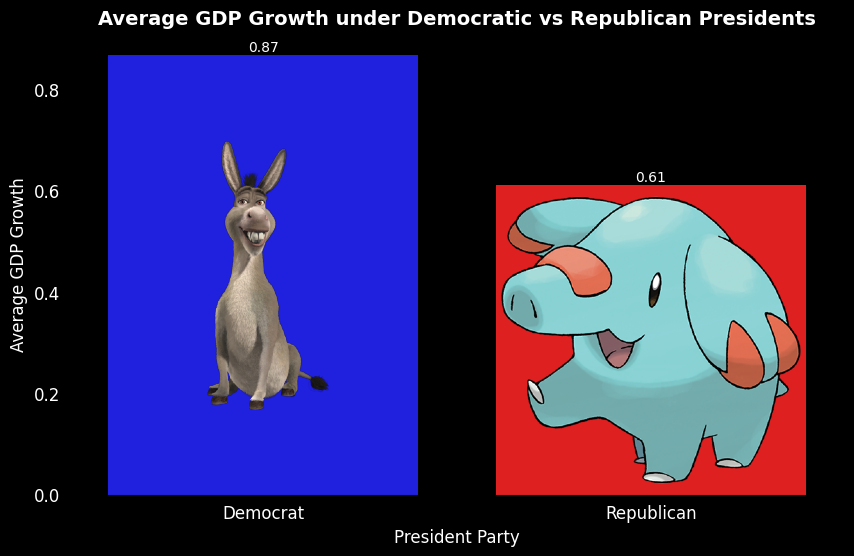

In [242]:
# Define the colors for the parties
party_colors = {'Democrat': 'blue', 'Republican': 'red'}

# Calculate the average GDP growth for each party
average_gdp_growth = final_economic_data.groupby('President_Party')['GDP_Growth'].mean().reset_index()

# Plot the average GDP growth using seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='President_Party', y='GDP_Growth', hue='President_Party', data=average_gdp_growth, palette=party_colors, legend=False)
ax.set_title('Average GDP Growth under Democratic vs Republican Presidents', fontsize=14, fontweight='bold', color='white')
ax.set_xlabel('President Party', fontsize=12, color='white')
ax.set_ylabel('Average GDP Growth', fontsize=12, color='white')

# Set the background color to dark
ax.set_facecolor('black')
plt.gcf().set_facecolor('black')

# Add the number at the top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', color='white')

# Make the plot clean and minimalistic
sns.despine()
plt.grid(False)
plt.xticks(rotation=0, fontsize=12, color='white')
plt.yticks(fontsize=12, color='white')

# Add party symbols within the bars
symbols = {'Democrat': 'DemLogo.png', 'Republican': 'RepLogo.png'}
for i, bar in enumerate(ax.patches):
    party = average_gdp_growth['President_Party'][i]
    symbol = plt.imread(symbols[party])
    imagebox = OffsetImage(symbol, zoom=0.5)  # Adjust zoom level as needed
    ab = AnnotationBbox(imagebox, (bar.get_x() + bar.get_width() / 2, bar.get_height() / 2), frameon=False, box_alignment=(0.5, 0.5))
    ax.add_artist(ab)

plt.show()

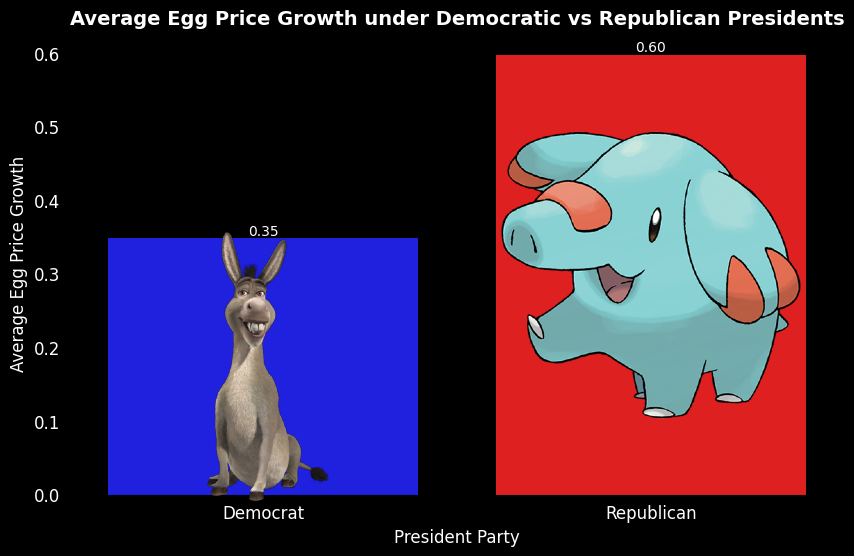

In [231]:
# Define the colors for the parties
party_colors = {'Democrat': 'blue', 'Republican': 'red'}

# Calculate the average GDP growth for each party
average_egg_price_growth = final_economic_data.groupby('President_Party')['Egg_Price'].mean().reset_index()

# Plot the average GDP growth using seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='President_Party', y='Egg_Price', hue='President_Party', data=average_egg_price_growth, palette=party_colors, legend=False)
ax.set_title('Average Egg Price Growth under Democratic vs Republican Presidents', fontsize=14, fontweight='bold', color='white')
ax.set_xlabel('President Party', fontsize=12, color='white')
ax.set_ylabel('Average Egg Price Growth', fontsize=12, color='white')

# Set the background color to dark
ax.set_facecolor('black')
plt.gcf().set_facecolor('black')

# Add the number at the top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', color='white')

# Make the plot clean and minimalistic
sns.despine()
plt.grid(False)
plt.xticks(rotation=0, fontsize=12, color='white')
plt.yticks(fontsize=12, color='white')

# Add party symbols within the bars
symbols = {'Democrat': 'DemLogo.png', 'Republican': 'RepLogo.png'}
for i, bar in enumerate(ax.patches):
    party = average_gdp_growth['President_Party'][i]
    symbol = plt.imread(symbols[party])
    imagebox = OffsetImage(symbol, zoom=0.5)  # Adjust zoom level as needed
    ab = AnnotationBbox(imagebox, (bar.get_x() + bar.get_width() / 2, bar.get_height() / 2), frameon=False, box_alignment=(0.5, 0.5))
    ax.add_artist(ab)

plt.show()

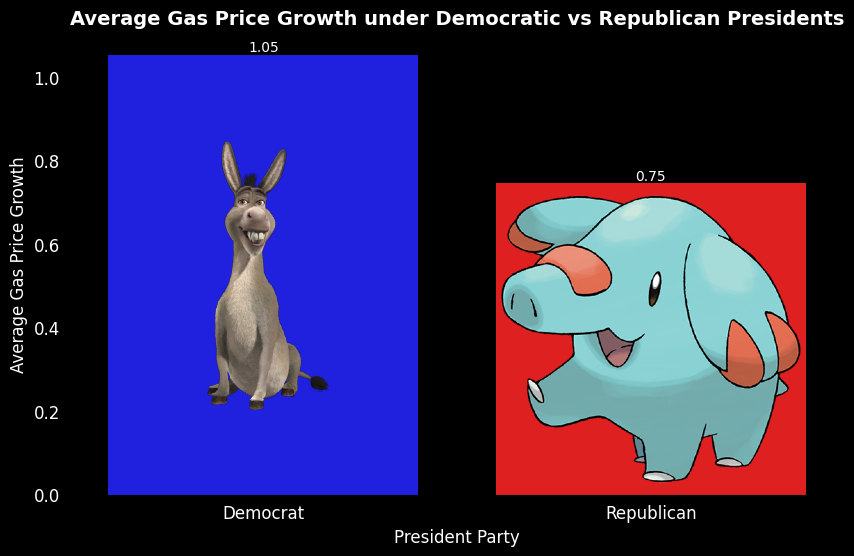

In [232]:
# Define the colors for the parties
party_colors = {'Democrat': 'blue', 'Republican': 'red'}

# Calculate the average GDP growth for each party
average_gas_price_growth = final_economic_data.groupby('President_Party')['Gas_Prices'].mean().reset_index()

# Plot the average GDP growth using seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='President_Party', y='Gas_Prices', hue='President_Party', data=average_gas_price_growth, palette=party_colors, legend=False)
ax.set_title('Average Gas Price Growth under Democratic vs Republican Presidents', fontsize=14, fontweight='bold', color='white')
ax.set_xlabel('President Party', fontsize=12, color='white')
ax.set_ylabel('Average Gas Price Growth', fontsize=12, color='white')

# Set the background color to dark
ax.set_facecolor('black')
plt.gcf().set_facecolor('black')

# Add the number at the top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', color='white')

# Make the plot clean and minimalistic
sns.despine()
plt.grid(False)
plt.xticks(rotation=0, fontsize=12, color='white')
plt.yticks(fontsize=12, color='white')

# Add party symbols within the bars
symbols = {'Democrat': 'DemLogo.png', 'Republican': 'RepLogo.png'}
for i, bar in enumerate(ax.patches):
    party = average_gdp_growth['President_Party'][i]
    symbol = plt.imread(symbols[party])
    imagebox = OffsetImage(symbol, zoom=0.5)  # Adjust zoom level as needed
    ab = AnnotationBbox(imagebox, (bar.get_x() + bar.get_width() / 2, bar.get_height() / 2), frameon=False, box_alignment=(0.5, 0.5))
    ax.add_artist(ab)

plt.show()


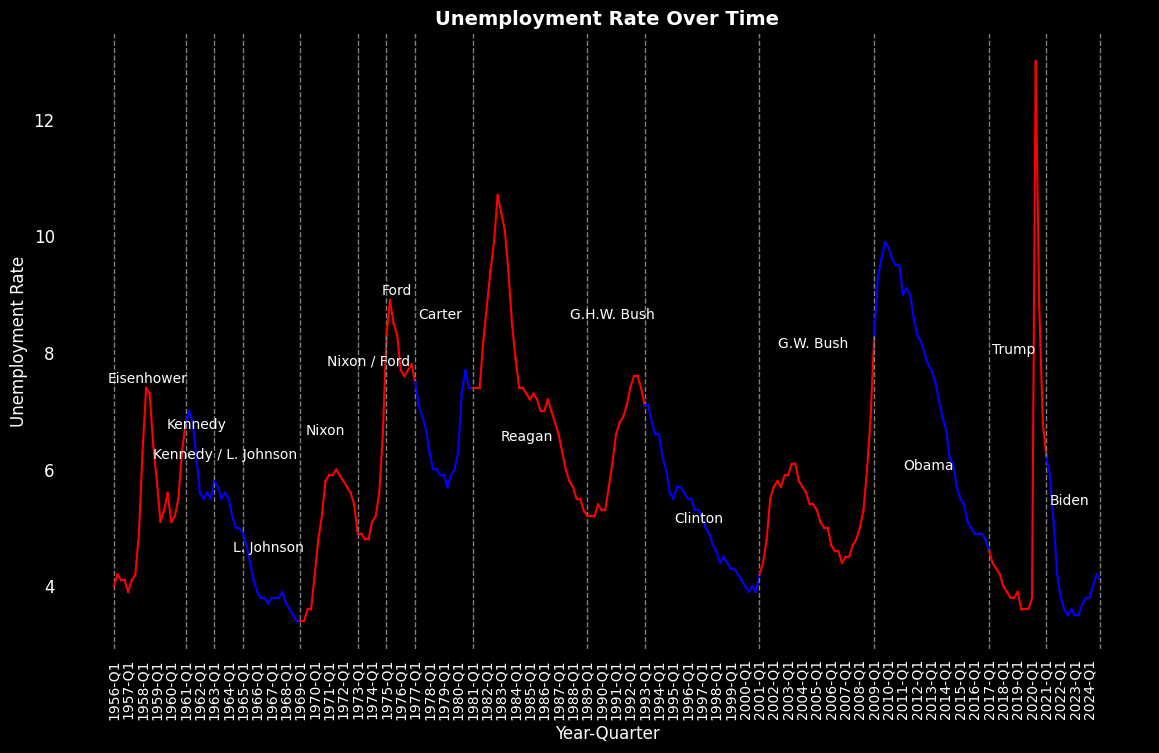

In [233]:
# Create a new column for Year-Quarter
final_economic_data['Year_Quarter'] = final_economic_data['Year'].astype(str) + '-Q' + final_economic_data['Quarter'].astype(str)

# Define the colors for the parties
party_colors = {'Democrat': 'blue', 'Republican': 'red'}

# Plot the unemployment rate as a line graph
plt.figure(figsize=(14, 8))

prevlinex = 0
plt.axvline(x=0, color='gray', linestyle='--', linewidth=1)

# Iterate through the data and plot each segment with the corresponding color
for i in range(len(final_economic_data) - 1):
    current_row = final_economic_data.iloc[i]
    next_row = final_economic_data.iloc[i + 1]
    plt.plot([current_row['Year_Quarter'], next_row['Year_Quarter']],
             [current_row['Unemployment_Rate'], next_row['Unemployment_Rate']],
             color=party_colors[current_row['President_Party']])
    # Draw a vertical line if the president changes
    if ((current_row['President'] != next_row['President']) or (i == len(final_economic_data) - 2)):
        # Draw a vertical line at the end of the current president's term
        plt.axvline(x=next_row['Year_Quarter'], color='gray', linestyle='--', linewidth=1)
        # Annotate the president's name centered between the vertical lines
        mid_point = (prevlinex + i) / 2
        plt.annotate(current_row['President'], 
                    xy=(mid_point, current_row['Unemployment_Rate']), 
                    xytext=(0, 50), 
                    textcoords='offset points', 
                    fontsize=10, 
                    color='white', 
                    ha='center')
        prevlinex = i

# Set the title and labels
plt.title('Unemployment Rate Over Time', fontsize=14, fontweight='bold', color='white')
plt.xlabel('Year-Quarter', fontsize=12, color='white')
plt.ylabel('Unemployment Rate', fontsize=12, color='white')

# Customize the plot appearance
plt.xticks(rotation=90, fontsize=10, color='white')
plt.yticks(fontsize=12, color='white')
plt.gcf().set_facecolor('black')
plt.gca().set_facecolor('black')
plt.grid(False)

# Label only the first quarter of each year
first_quarters = final_economic_data[final_economic_data['Quarter'] == 1]['Year_Quarter']
plt.xticks(ticks=range(0, len(final_economic_data), 4), labels=first_quarters)

plt.show()

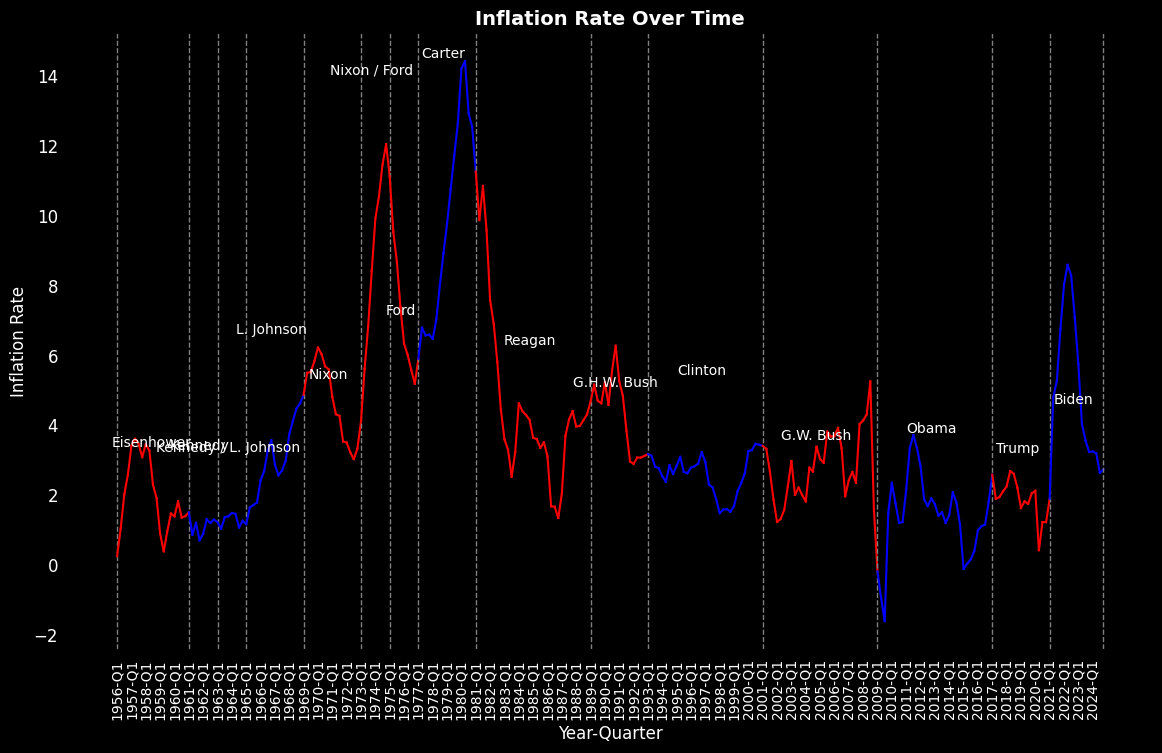

In [234]:
# Create a new column for Year-Quarter
final_economic_data['Year_Quarter'] = final_economic_data['Year'].astype(str) + '-Q' + final_economic_data['Quarter'].astype(str)

# Define the colors for the parties
party_colors = {'Democrat': 'blue', 'Republican': 'red'}

# Plot the inflation rate as a line graph
plt.figure(figsize=(14, 8))

prevlinex = 0
plt.axvline(x=0, color='gray', linestyle='--', linewidth=1)

# Iterate through the data and plot each segment with the corresponding color
for i in range(len(final_economic_data) - 1):
    current_row = final_economic_data.iloc[i]
    next_row = final_economic_data.iloc[i + 1]
    plt.plot([current_row['Year_Quarter'], next_row['Year_Quarter']],
             [current_row['Inflation_Rate'], next_row['Inflation_Rate']],
             color=party_colors[current_row['President_Party']])
    # Draw a vertical line if the president changes
    if ((current_row['President'] != next_row['President']) or (i == len(final_economic_data) - 2)):
        # Draw a vertical line at the end of the current president's term
        plt.axvline(x=next_row['Year_Quarter'], color='gray', linestyle='--', linewidth=1)
        # Annotate the president's name centered between the vertical lines
        mid_point = (prevlinex + i) / 2
        plt.annotate(current_row['President'], 
                    xy=(mid_point, current_row['Inflation_Rate']), 
                    xytext=(0, 50), 
                    textcoords='offset points', 
                    fontsize=10, 
                    color='white', 
                    ha='center')
        prevlinex = i

# Set the title and labels
plt.title('Inflation Rate Over Time', fontsize=14, fontweight='bold', color='white')
plt.xlabel('Year-Quarter', fontsize=12, color='white')
plt.ylabel('Inflation Rate', fontsize=12, color='white')

# Customize the plot appearance
plt.xticks(rotation=90, fontsize=10, color='white')
plt.yticks(fontsize=12, color='white')
plt.gcf().set_facecolor('black')
plt.gca().set_facecolor('black')
plt.grid(False)

# Label only the first quarter of each year
first_quarters = final_economic_data[final_economic_data['Quarter'] == 1]['Year_Quarter']
plt.xticks(ticks=range(0, len(final_economic_data), 4), labels=first_quarters)

plt.show()

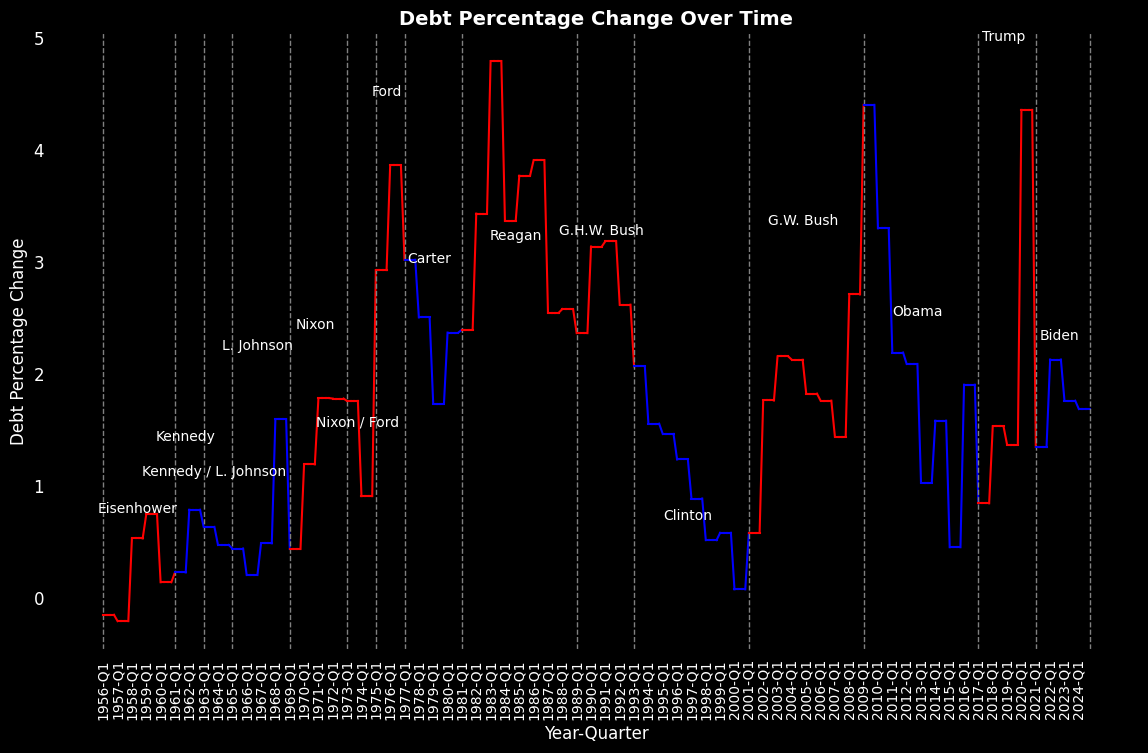

In [235]:
# Create a new column for Year-Quarter
final_economic_data['Year_Quarter'] = final_economic_data['Year'].astype(str) + '-Q' + final_economic_data['Quarter'].astype(str)

# Define the colors for the parties
party_colors = {'Democrat': 'blue', 'Republican': 'red'}

# Plot the debt percentage change as a line graph
plt.figure(figsize=(14, 8))

prevlinex = 0
plt.axvline(x=0, color='gray', linestyle='--', linewidth=1)

# Iterate through the data and plot each segment with the corresponding color
for i in range(len(final_economic_data) - 1):
    current_row = final_economic_data.iloc[i]
    next_row = final_economic_data.iloc[i + 1]
    plt.plot([current_row['Year_Quarter'], next_row['Year_Quarter']],
             [current_row['Debt_Percent_Change'], next_row['Debt_Percent_Change']],
             color=party_colors[current_row['President_Party']])
    # Draw a vertical line if the president changes
    if ((current_row['President'] != next_row['President']) or (i == len(final_economic_data) - 2)):
        # Draw a vertical line at the end of the current president's term
        plt.axvline(x=next_row['Year_Quarter'], color='gray', linestyle='--', linewidth=1)
        # Annotate the president's name centered between the vertical lines
        mid_point = (prevlinex + i) / 2
        plt.annotate(current_row['President'], 
                    xy=(mid_point, current_row['Debt_Percent_Change']), 
                    xytext=(0, 50), 
                    textcoords='offset points', 
                    fontsize=10, 
                    color='white', 
                    ha='center')
        prevlinex = i

# Set the title and labels
plt.title('Debt Percentage Change Over Time', fontsize=14, fontweight='bold', color='white')
plt.xlabel('Year-Quarter', fontsize=12, color='white')
plt.ylabel('Debt Percentage Change', fontsize=12, color='white')

# Customize the plot appearance
plt.xticks(rotation=90, fontsize=10, color='white')
plt.yticks(fontsize=12, color='white')
plt.gcf().set_facecolor('black')
plt.gca().set_facecolor('black')
plt.grid(False)

# Label only the first quarter of each year
first_quarters = final_economic_data[final_economic_data['Quarter'] == 1]['Year_Quarter']
plt.xticks(ticks=range(0, len(final_economic_data), 4), labels=first_quarters)

plt.show()

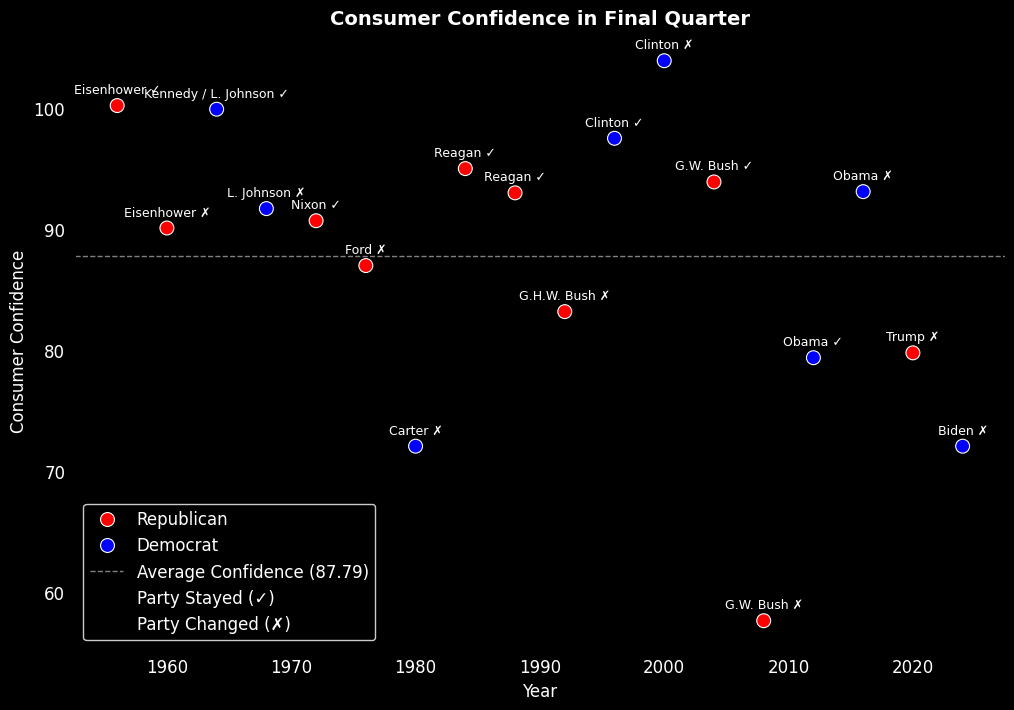

In [236]:
# Define the colors for the parties
party_colors = {'Democrat': 'blue', 'Republican': 'red'}

# Create a scatter plot of Consumer Confidence in the final quarter
plt.figure(figsize=(12, 8))
ax = sns.scatterplot(data=final_election_results, x='Year', y='Consumer_Confidence', hue='President_Party', palette=party_colors, s=100)

# Set the background color to black
ax.set_facecolor('black')
plt.gcf().set_facecolor('black')

# Set the title and labels
ax.set_title('Consumer Confidence in Final Quarter', fontsize=14, fontweight='bold', color='white')
ax.set_xlabel('Year', fontsize=12, color='white')
ax.set_ylabel('Consumer Confidence', fontsize=12, color='white')

# Label each scatter point with the president's name and a check mark or cross mark
for i in range(final_election_results.shape[0]):
    mark = '✓' if final_election_results['President_Party_Stayed'][i] else '✗'
    plt.text(final_election_results['Year'][i], final_election_results['Consumer_Confidence'][i] + 1, 
             f"{final_election_results['President'][i]} {mark}", fontsize=9, color='white', ha='center')

# Customize the plot appearance
sns.despine()
plt.grid(False)
plt.xticks(fontsize=12, color='white')
plt.yticks(fontsize=12, color='white')

# Plot the average line
average_confidence = final_election_results['Consumer_Confidence'].mean()
plt.axhline(y=average_confidence, color='gray', linestyle='--', linewidth=1, label=f'Average Confidence ({average_confidence:.2f})')

# Add custom legend entries for check mark and cross mark
handles, labels = ax.get_legend_handles_labels()
handles.extend([plt.Line2D([0], [0], color='w', label='Party Stayed (✓)', linestyle='None'),
                plt.Line2D([0], [0], color='w', label='Party Changed (✗)', linestyle='None'),])

legend = plt.legend(handles=handles, fontsize='12', facecolor='black', edgecolor='white', labelcolor='white', loc='lower left')

# Show the plot
plt.show()

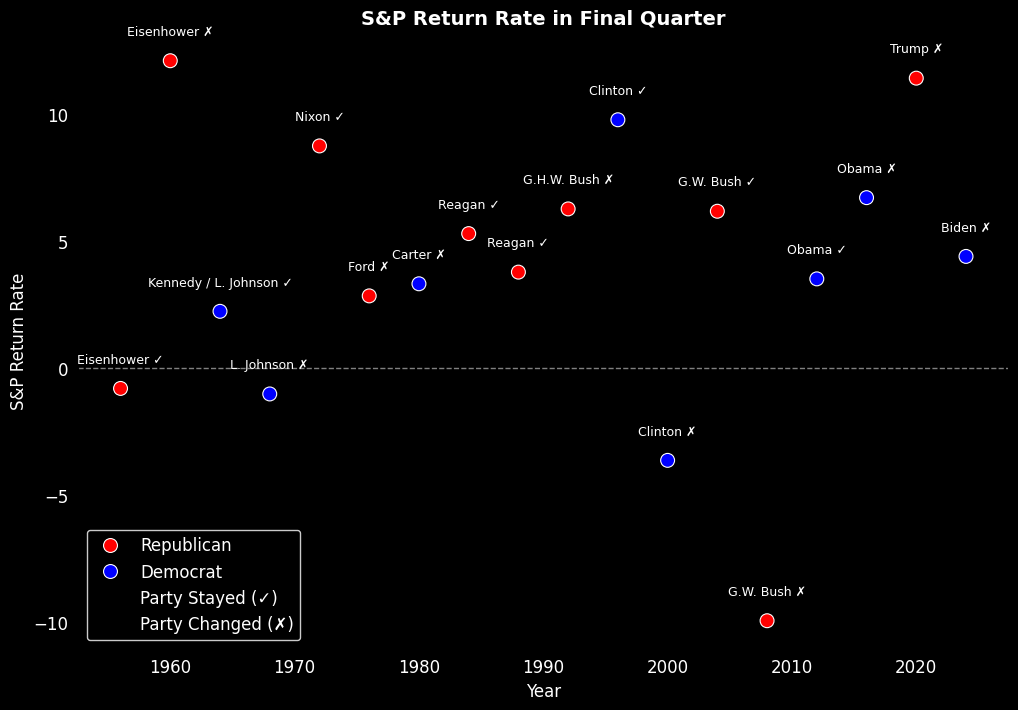

In [237]:
plt.figure(figsize=(12, 8))

# Modify the scatter plot to show S&P Return Rate in the final quarter
ax = sns.scatterplot(data=final_election_results, x='Year', y='SP500_Return_Rate', hue='President_Party', palette=party_colors, s=100)

# Set the background color to black
ax.set_facecolor('black')
plt.gcf().set_facecolor('black')

# Set the title and labels
ax.set_title('S&P Return Rate in Final Quarter', fontsize=14, fontweight='bold', color='white')
ax.set_xlabel('Year', fontsize=12, color='white')
ax.set_ylabel('S&P Return Rate', fontsize=12, color='white')

# Label each scatter point with the president's name and a check mark or cross mark
for i in range(final_election_results.shape[0]):
    mark = '✓' if final_election_results['President_Party_Stayed'][i] else '✗'
    plt.text(final_election_results['Year'][i], final_election_results['SP500_Return_Rate'][i] + 1, 
             f"{final_election_results['President'][i]} {mark}", fontsize=9, color='white', ha='center')

# Customize the plot appearance
sns.despine()
plt.grid(False)
plt.xticks(fontsize=12, color='white')
plt.yticks(fontsize=12, color='white')

# Add custom legend entries for check mark and cross mark
handles, labels = ax.get_legend_handles_labels()
handles.extend([plt.Line2D([0], [0], marker='', color='w', markersize=0, label='Party Stayed (✓)', linestyle='None'),
                plt.Line2D([0], [0], marker='', color='w', markersize=0, label='Party Changed (✗)', linestyle='None')])

legend = plt.legend(handles=handles, fontsize='12', facecolor='black', edgecolor='white', labelcolor='white')

# Add a horizontal line at y=0
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)

# Show the plot
plt.show()


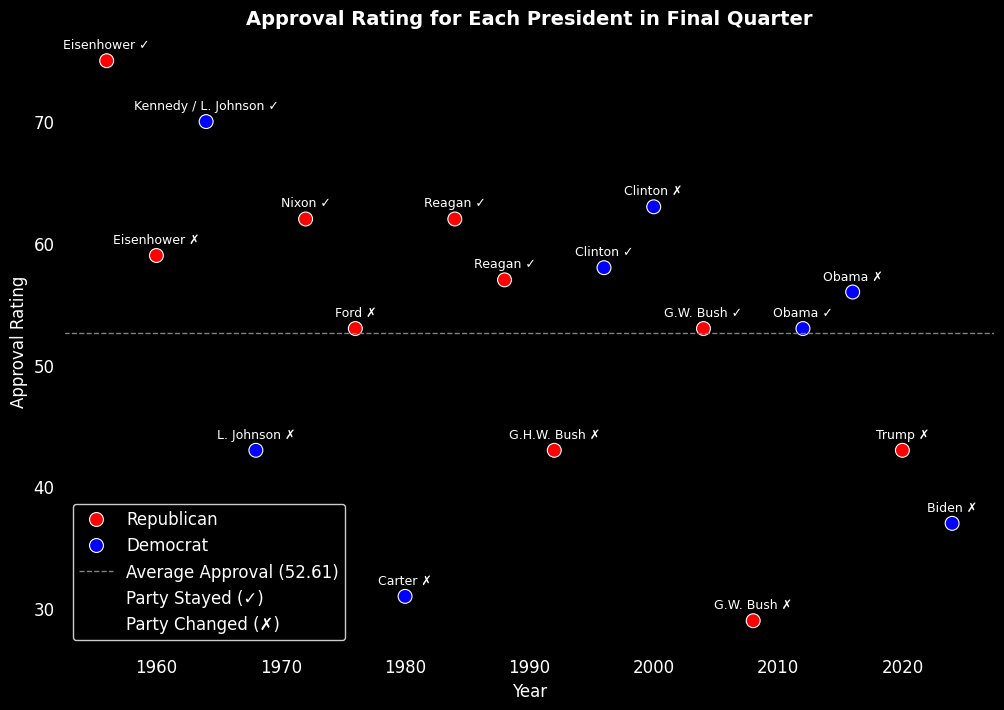

In [238]:
# Create a scatter plot of approval rating for each president
plt.figure(figsize=(12, 8))
ax = sns.scatterplot(data=final_election_results, x='Year', y='Approval', hue='President_Party', palette=party_colors, s=100)

# Set the background color to black
ax.set_facecolor('black')
plt.gcf().set_facecolor('black')

# Set the title and labels
ax.set_title('Approval Rating for Each President in Final Quarter', fontsize=14, fontweight='bold', color='white')
ax.set_xlabel('Year', fontsize=12, color='white')
ax.set_ylabel('Approval Rating', fontsize=12, color='white')

# Label each scatter point with the president's name and a check mark or cross mark
for i in range(final_election_results.shape[0]):
    mark = '✓' if final_election_results['President_Party_Stayed'][i] else '✗'
    plt.text(final_election_results['Year'][i], final_election_results['Approval'][i] + 1, 
             f"{final_election_results['President'][i]} {mark}", fontsize=9, color='white', ha='center')

# Customize the plot appearance
sns.despine()
plt.grid(False)
plt.xticks(fontsize=12, color='white')
plt.yticks(fontsize=12, color='white')

# Add a horizontal line at the average approval rating
average_approval = final_election_results['Approval'].mean()
plt.axhline(y=average_approval, color='gray', linestyle='--', linewidth=1, label=f'Average Approval ({average_approval:.2f})')

# Add custom legend entries for check mark and cross mark
handles, labels = ax.get_legend_handles_labels()
handles.extend([plt.Line2D([0], [0], marker='', color='w', markersize=0, label='Party Stayed (✓)', linestyle='None'),
                plt.Line2D([0], [0], marker='', color='w', markersize=0, label='Party Changed (✗)', linestyle='None')])
labels.extend(['Party Stayed (✓)', 'Party Changed (✗)'])
legend = plt.legend(handles=handles, fontsize='12', facecolor='black', edgecolor='white', labelcolor='white', loc='lower left')


# Show the plot
plt.show()

# Modeling 

In [239]:
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, r2_score

In [240]:
# Load the final datasets
final_economic_data = pd.read_csv('final_economic_data.csv')
final_election_results = pd.read_csv('final_election_results.csv')

nonNumericalColumns = ['Year', 'Quarter', 'President', 'President_Party', 'House_Majority', 'Senate_Majority', 'unified', 'Recession']

# Display the first half of the columns
display(final_economic_data[final_economic_data.columns[:(1+len(final_economic_data.columns)//2)]].head())

# Display the second half of the columns
display(final_economic_data[final_economic_data.columns[(1+len(final_economic_data.columns)//2):]].head())




,Year,Quarter,GDP_Growth,Recession,Unemployment_Rate,Inflation_Rate,Gas_Prices,SP500_Return_Rate,Consumer_Confidence
0,1956,1,-0.38880,True,4.0,0.24882,0.00000,9.830277,98.95
1,1956,2,0.82318,False,4.2,1.04647,0.88496,2.479559,98.20
2,1956,3,-0.08974,True,4.1,2.01668,3.03711,-4.279415,99.90
3,1956,4,1.63251,False,4.1,2.58161,-0.85837,-0.793072,100.20
4,1957,1,0.63823,False,3.9,3.41276,2.13228,0.130657,96.55


,Federal_Funds_Rate,Debt_Percent_Change,Egg_Price,President,President_Party,House_Majority,Senate_Majority,unified
0,2.48,-0.148249,-0.138338,Eisenhower,Republican,Democrats,Democrats,False
1,2.69,-0.148249,-0.138338,Eisenhower,Republican,Democrats,Democrats,False
2,2.81,-0.148249,-0.138338,Eisenhower,Republican,Democrats,Democrats,False
3,2.93,-0.148249,-0.138338,Eisenhower,Republican,Democrats,Democrats,False
4,2.93,-0.204442,-1.219858,Eisenhower,Republican,Democrats,Democrats,False


In [176]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Assuming final_election_results is already defined and contains the necessary data
# Define the predictor variables (excluding non-numeric, target columns, Quarter, and Turnout_as_%_VAP)
predictor_columns = final_election_results.columns.drop(['Year', 'President', 'President_Party', 'House_Majority', 'Senate_Majority', 'President_Party_Stayed', 'Quarter'])
X = final_election_results[predictor_columns]

# Ensure all columns in X are numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Fill NaN values with the mean of the column
X = X.fillna(X.mean())

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Define the target variable
y = final_election_results['President_Party_Stayed'].astype(bool)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Make predictions on the same data
y_pred = model.predict(X)

# Evaluate the model
accuracy = accuracy_score(y, y_pred)
report = classification_report(y, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 0.9444444444444444
Classification Report:
               precision    recall  f1-score   support

       False       1.00      0.90      0.95        10
        True       0.89      1.00      0.94         8

    accuracy                           0.94        18
   macro avg       0.94      0.95      0.94        18
weighted avg       0.95      0.94      0.94        18



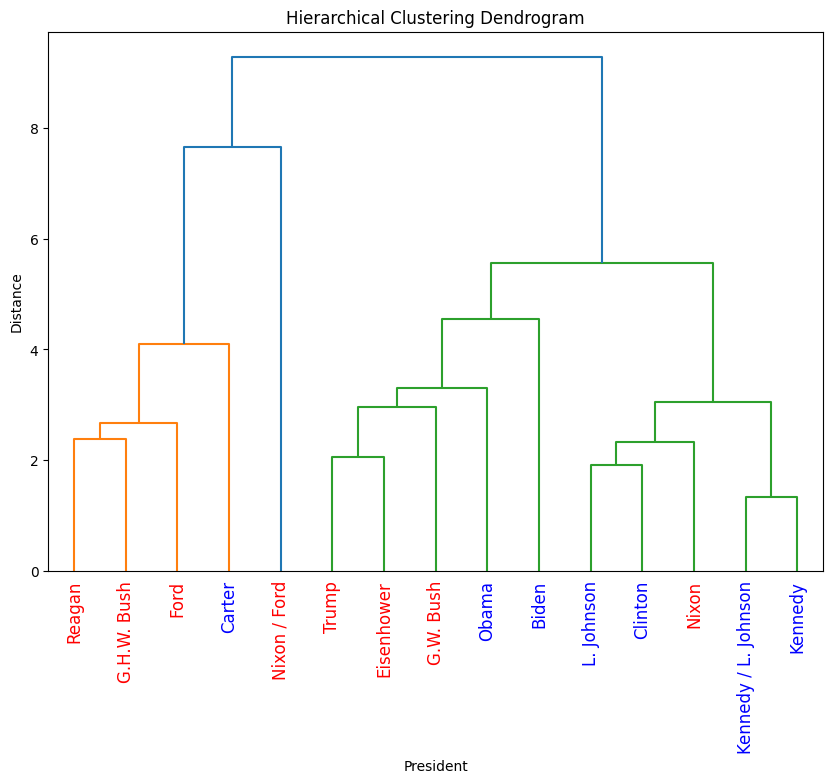

In [244]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

import matplotlib.pyplot as plt

# Define the colors for the parties
party_colors = {'Democrat': 'blue', 'Republican': 'red'}

# Drop non-numeric columns
term_data_numeric = final_economic_data.drop(columns=['Year', 'Quarter', 'Recession', 'President_Party', 'House_Majority', 'Senate_Majority', 'unified'])

# Combine the quarters into "terms" by taking the mean of each president's term
term_data_numeric = term_data_numeric.groupby('President').mean().reset_index()

# Standardize the data
scaler = StandardScaler()
term_data_scaled = scaler.fit_transform(term_data_numeric.drop(columns=['President']))

# Perform hierarchical clustering
linked = linkage(term_data_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, labels=term_data_numeric['President'].values, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('President')
plt.ylabel('Distance')
plt.xticks(rotation=90)  # Make x-axis labels vertical

# Correlate the color of the x-axis label with the president's party color
ax = plt.gca()
x_labels = ax.get_xmajorticklabels()
for label in x_labels:
    president = label.get_text()
    party = final_economic_data[final_economic_data['President'] == president]['President_Party'].values[0]
    label.set_color(party_colors[party])

plt.show()


Index(['GDP_Growth', 'Unemployment_Rate', 'Inflation_Rate', 'Gas_Prices',
       'SP500_Return_Rate', 'Consumer_Confidence', 'Federal_Funds_Rate',
       'Debt_Percent_Change', 'Egg_Price'],
      dtype='object')


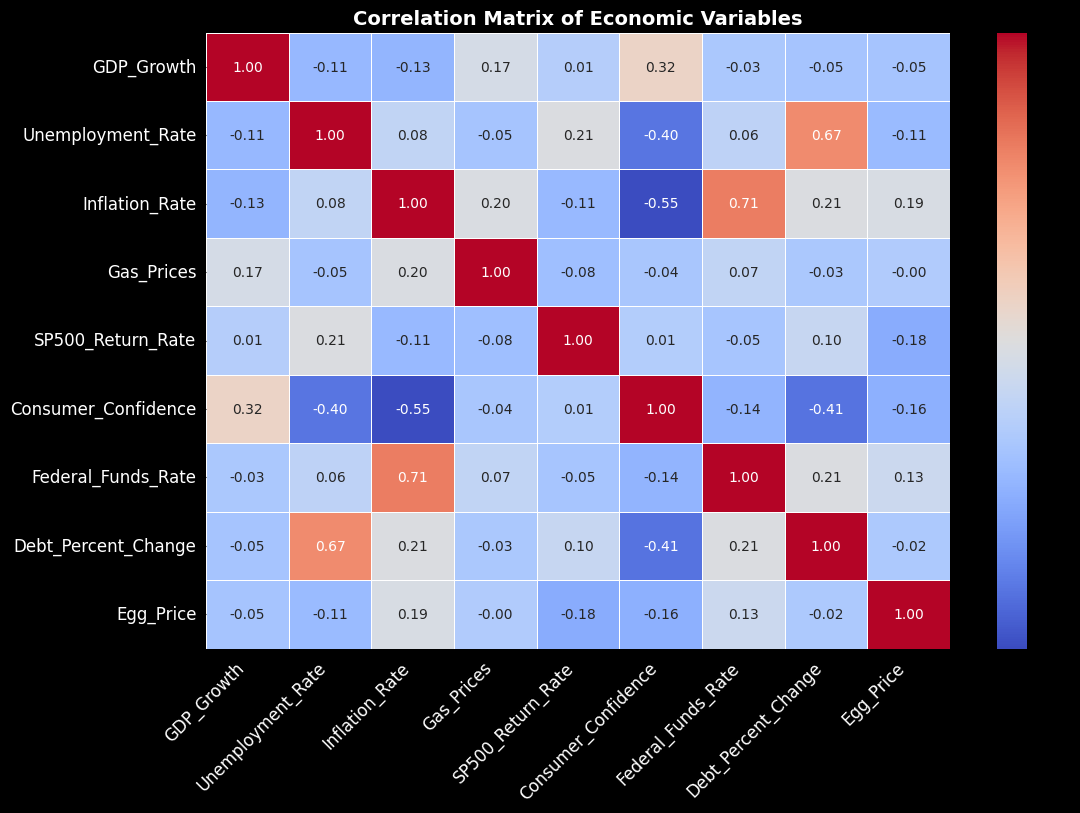

In [245]:
# Remove non-numerical columns
numerical_data = final_economic_data.select_dtypes(include=[np.number])
# Remove Year and Quarter columns
numerical_data = numerical_data.drop(columns=['Year', 'Quarter'])
print(numerical_data.columns)

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Plot the correlation matrix using seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Economic Variables', fontsize=14, fontweight='bold', color='white')

# Customize the plot appearance
plt.xticks(fontsize=12, color='white', rotation=45, ha='right')
plt.yticks(fontsize=12, color='white')
plt.gcf().set_facecolor('black')
plt.gca().set_facecolor('black')

plt.show()